In [1]:
import pandas as pd
import numpy as np
from sklearn.linear_model import LinearRegression ,Ridge , Lasso
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import cross_val_score ,KFold
from sklearn.ensemble import RandomForestRegressor
from sklearn.preprocessing import StandardScaler ,LabelEncoder
from catboost import CatBoostRegressor
import math
from sklearn.metrics import mean_squared_log_error ,r2_score

sns.set_theme(style="ticks", color_codes=True)
%matplotlib inline

In [2]:
#Trainig file 
df_train = pd.read_csv('TRAIN (1).csv')

# Testing file
df_test = pd.read_csv('TEST_FINAL.csv')

In [3]:
df_train.head(3)

,ID,Store_id,Store_Type,Location_Type,Region_Code,Date,Holiday,Discount,#Order,Sales
0,T1000001,1,S1,L3,R1,2018-01-01,1,Yes,9,7011.84
1,T1000002,253,S4,L2,R1,2018-01-01,1,Yes,60,51789.12
2,T1000003,252,S3,L2,R1,2018-01-01,1,Yes,42,36868.20


In [4]:
df_test.head(4)

,ID,Store_id,Store_Type,Location_Type,Region_Code,Date,Holiday,Discount
0,T1188341,171,S4,L2,R3,2019-06-01,0,No
1,T1188342,172,S1,L1,R1,2019-06-01,0,No
2,T1188343,173,S4,L2,R1,2019-06-01,0,No
3,T1188344,174,S1,L1,R4,2019-06-01,0,No


In [5]:
class DataInfo:
    def __init__(self,df):
        self.df = df

    def info(self): 
        
        # Counting no of rows 
        print(f'\nTotal Rows : {self.df.shape[0]} \n' + '--'*10 )
      
        # Counting no of columns
        print(f'\nTotal Columns : {self.df.shape[1]} \n' + '--'*10)
        
        # Extracting column names
        column_name =  self.df.columns 
        print(f'\nColumn Names\n' + '--'*10 +  f'\n{column_name} \n \n')
        
        # Data type info
        print(f'Data Summary\n' + '--'*10)
        data_summary = self.df.info() 
        
        # Total null values by each categories
        null_values = self.df.isnull().sum() 
        print(f'\nNull values\n' + '--'*10 + f'\n{null_values} \n \n')

        # Descriptive statistics
        describe =  self.df.describe() 
        print(f'\nDescriptive Statistics\n' + '--'*10 +  f'\n{describe} \n \n')
        
        # Unique categories description
    def uniqueCategory(self):      
        
        # Number of Unique values in each column
        uniques_values = self.df.apply(lambda x : len(x.unique())) 
        print(f'Unique Values\n' + '--'*10 +  f'\n{uniques_values} \n \n')
        
        for i in self.df.columns: 
            if self.df[i].dtype == 'O':          # Columns having datatype object or categories in each column
                unique_category = set(self.df.loc[: , i])      # Unique categories in each columns
                
                if len(unique_category)>=100:
                    print(f'{i} -- {list(unique_category)[:50]}\n')
                    continue  #Taking only top 50 as more than 100 will messed up
                else:
                    print(f'\n{i} -- {unique_category}\n')


In [6]:
train_obj = DataInfo(df_train)

train_obj.info()


Total Rows : 188340 
--------------------

Total Columns : 10 
--------------------

Column Names
--------------------
Index(['ID', 'Store_id', 'Store_Type', 'Location_Type', 'Region_Code', 'Date',
       'Holiday', 'Discount', '#Order', 'Sales'],
      dtype='object') 
 

Data Summary
--------------------
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 188340 entries, 0 to 188339
Data columns (total 10 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   ID             188340 non-null  object 
 1   Store_id       188340 non-null  int64  
 2   Store_Type     188340 non-null  object 
 3   Location_Type  188340 non-null  object 
 4   Region_Code    188340 non-null  object 
 5   Date           188340 non-null  object 
 6   Holiday        188340 non-null  int64  
 7   Discount       188340 non-null  object 
 8   #Order         188340 non-null  int64  
 9   Sales          188340 non-null  float64
dtypes: float64(1), int64(3), object(6)


In [8]:
train_obj.uniqueCategory()

Unique Values
--------------------
ID               188340
Store_id            365
Store_Type            4
Location_Type         5
Region_Code           4
Date                516
Holiday               2
Discount              2
#Order              299
Sales             47422
dtype: int64 
 

ID -- ['T1081944', 'T1175192', 'T1105720', 'T1016173', 'T1109124', 'T1043548', 'T1034422', 'T1037734', 'T1096355', 'T1112015', 'T1010051', 'T1136579', 'T1162296', 'T1036897', 'T1056733', 'T1037475', 'T1108840', 'T1065129', 'T1157367', 'T1175527', 'T1151752', 'T1181600', 'T1030020', 'T1025915', 'T1075492', 'T1148271', 'T1053650', 'T1121043', 'T1164304', 'T1168292', 'T1136454', 'T1062135', 'T1054831', 'T1152188', 'T1007929', 'T1139556', 'T1070856', 'T1024800', 'T1004570', 'T1117323', 'T1151676', 'T1095910', 'T1162448', 'T1072475', 'T1044537', 'T1130609', 'T1140507', 'T1014385', 'T1137114', 'T1138990']


Store_Type -- {'S2', 'S3', 'S1', 'S4'}


Location_Type -- {'L1', 'L3', 'L4', 'L2', 'L5'}


Region_C

## Exploratory Data Analysis

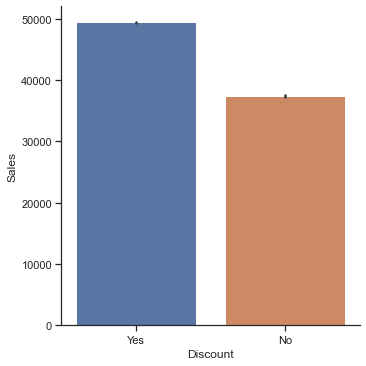

In [9]:
sns.catplot(x=df_train['Discount'] ,y= df_train['Sales'], data = df_train ,kind = 'bar')

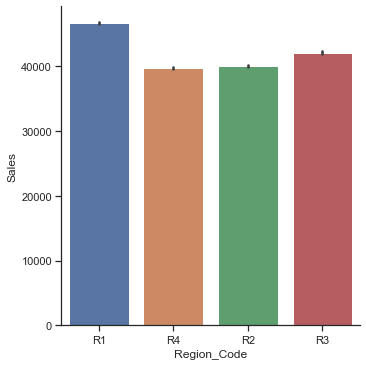

In [10]:
#Checking sales outcome w.r.t region
sns.catplot(x=df_train['Region_Code'],y=df_train['Sales'],data = df_train , kind = 'bar')

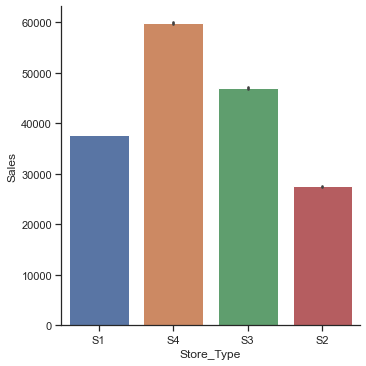

In [11]:
# sales outcome by location type w.r.t region
sns.catplot(x=df_train['Store_Type'],y=df_train['Sales'],kind = 'bar',data = df_train)

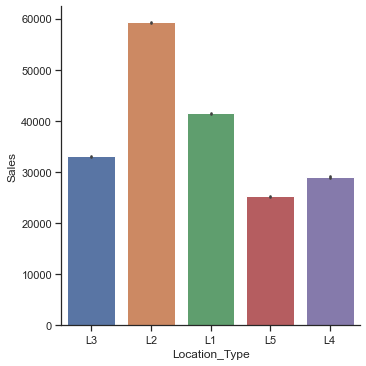

In [12]:
sns.catplot(x=df_train['Location_Type'],y=df_train['Sales'],kind = 'bar',data = df_train)

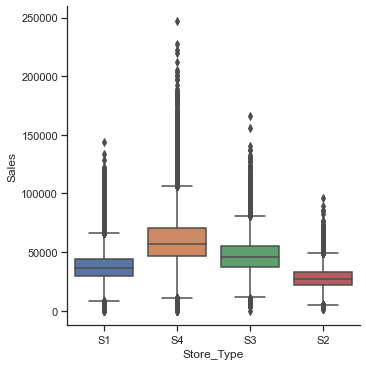

In [13]:
#Checking outliers w.r.t store type 
sns.catplot(x=df_train['Store_Type'],y=df_train['Sales'],kind ='box',data = df_train)

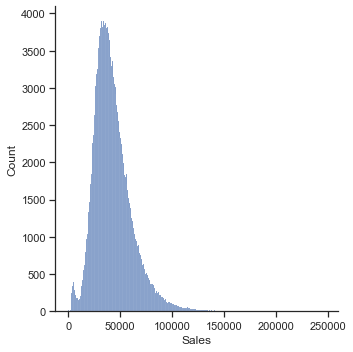

In [14]:
sns.displot(df_train['Sales'])

## Feature Engineering and Transformation

In [15]:
class Transformation:
    def __init__(self , df):
        
        self.df = df

    def transformation(self):
        
        #One hot encoding in columns
        self.df = pd.get_dummies(self.df ,columns=['Store_Type','Location_Type','Discount'])

        #Encoding Region codes
        reg_encode= LabelEncoder()
        self.df['Region_Code'] = reg_encode.fit_transform(self.df['Region_Code'])

        #Converting date column into datetime object
        self.df['Date'] = pd.to_datetime(self.df['Date'])

        # Extracting month from date 
        self.df['Month'] = self.df['Date'].dt.month

        # #Extracting days from date 
        self.df['sale_weekdays'] = self.df['Date'].dt.dayofweek

        #sale on weekend and week day apart
        self.df['sale_week'] = self.df['sale_weekdays'].apply(lambda x : 1 if x >=5 else 0 )
        
        # Dropping unnecessary columns
        self.df.drop(['ID','Date'	,'sale_weekdays'] ,axis = 1 ,inplace = True)
        
        return self.df


In [16]:
# trainning dataset after transformation

train_trans = Transformation(df_train)
train =train_trans.transformation()
train.head(3)

,Store_id,Region_Code,Holiday,#Order,Sales,Store_Type_S1,Store_Type_S2,Store_Type_S3,Store_Type_S4,Location_Type_L1,Location_Type_L2,Location_Type_L3,Location_Type_L4,Location_Type_L5,Discount_No,Discount_Yes,Month,sale_week
0,1,0,1,9,7011.84,1,0,0,0,0,0,1,0,0,0,1,1,0
1,253,0,1,60,51789.12,0,0,0,1,0,1,0,0,0,0,1,1,0
2,252,0,1,42,36868.20,0,0,1,0,0,1,0,0,0,0,1,1,0


In [17]:
# IQR
Q1 = np.percentile(train['Sales'], 25,
                   interpolation = 'midpoint')
 
Q3 = np.percentile(train['Sales'], 75,
                   interpolation = 'midpoint')
IQR = Q3 - Q1
 
print("Old Shape: ", train.shape)
 
# Upper bound
upper = np.where(train['Sales'] >= (Q3+1.5*IQR))
# Lower bound
lower = np.where(train['Sales'] <= (Q1-1.5*IQR))
 
''' Removing the Outliers '''
train.drop(upper[0] ,inplace = True)
train.drop(lower[0],inplace = True )
 
print("New Shape: ", train.shape)

Old Shape:  (188340, 18)
New Shape:  (182497, 18)


## Exploration after transformation

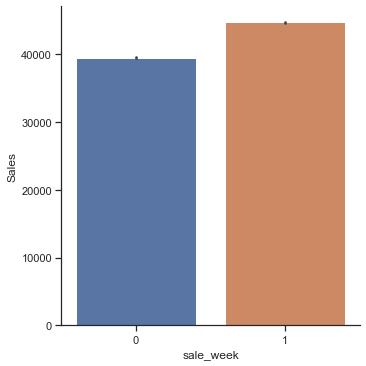

In [18]:
#Sale on weekdays vs weekend
sns.catplot(x=train['sale_week'],y=train['Sales'],kind = 'bar',data = train)

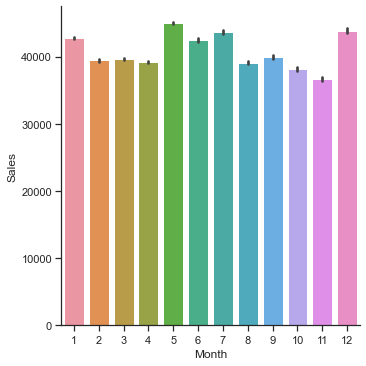

In [19]:
# Months vs sale visualisation
sns.catplot(x=train['Month'],y=train['Sales'],kind = 'bar',data = train)

In [20]:
#checking is there any rows which has no sales 
zero_sales = train[train['Sales']<=0].index
len(zero_sales)

19

In [21]:
train.drop(zero_sales,inplace= True)

In [22]:
#moving sales column to the last position
move_train = train.pop('Sales')
train.insert(len(train.columns),'Sales' ,move_train)

In [23]:
train.head(3)

,Store_id,Region_Code,Holiday,#Order,Store_Type_S1,Store_Type_S2,Store_Type_S3,Store_Type_S4,Location_Type_L1,Location_Type_L2,Location_Type_L3,Location_Type_L4,Location_Type_L5,Discount_No,Discount_Yes,Month,sale_week,Sales
0,1,0,1,9,1,0,0,0,0,0,1,0,0,0,1,1,0,7011.84
1,253,0,1,60,0,0,0,1,0,1,0,0,0,0,1,1,0,51789.12
2,252,0,1,42,0,0,1,0,0,1,0,0,0,0,1,1,0,36868.20


# Test Data Preprocessing

In [24]:
#Descriptive Information for test data

test_obj = DataInfo(df_test)
test_obj.info()


Total Rows : 22265 
----------------------------------------

Total Columns : 8 

            Column Names       
----------------------------------------
Index(['ID', 'Store_id', 'Store_Type', 'Location_Type', 'Region_Code', 'Date',
       'Holiday', 'Discount'],
      dtype='object') 
 

           Data Summary         
----------------------------------------
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 22265 entries, 0 to 22264
Data columns (total 8 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   ID             22265 non-null  object
 1   Store_id       22265 non-null  int64 
 2   Store_Type     22265 non-null  object
 3   Location_Type  22265 non-null  object
 4   Region_Code    22265 non-null  object
 5   Date           22265 non-null  object
 6   Holiday        22265 non-null  int64 
 7   Discount       22265 non-null  object
dtypes: int64(2), object(6)
memory usage: 1.4+ MB

            Null values           
----------

In [25]:
#Unique categories and it's count in test data

test_obj.uniqueCategory()

            Unique Values       
----------------------------------------
ID               22265
Store_id           365
Store_Type           4
Location_Type        5
Region_Code          4
Date                61
Holiday              2
Discount             2
dtype: int64 
 

ID -- ['T1203411', 'T1198584', 'T1199419', 'T1188582', 'T1200821', 'T1197488', 'T1209628', 'T1196170', 'T1189638', 'T1190115', 'T1205437', 'T1188802', 'T1189399', 'T1206844', 'T1204915', 'T1196108', 'T1203686', 'T1199773', 'T1196143', 'T1198733']


Store_Type -- {'S1', 'S4', 'S2', 'S3'}


Location_Type -- {'L4', 'L5', 'L3', 'L2', 'L1'}


Region_Code -- {'R2', 'R4', 'R1', 'R3'}


Date -- {'2019-06-16', '2019-07-23', '2019-07-04', '2019-07-03', '2019-06-14', '2019-06-20', '2019-06-09', '2019-06-26', '2019-07-12', '2019-06-07', '2019-07-07', '2019-06-30', '2019-07-09', '2019-06-02', '2019-06-19', '2019-06-18', '2019-07-01', '2019-06-24', '2019-06-11', '2019-06-12', '2019-07-21', '2019-06-21', '2019-07-25', '2019-06-29'

In [26]:
#Applying the same feature engineering in test data

test_trans = Transformation(df_test)
test = test_trans.transformation()
test.head(3)

,Store_id,Region_Code,Holiday,Store_Type_S1,Store_Type_S2,Store_Type_S3,Store_Type_S4,Location_Type_L1,Location_Type_L2,Location_Type_L3,Location_Type_L4,Location_Type_L5,Discount_No,Discount_Yes,Month,sale_week
0,171,2,0,0,0,0,1,0,1,0,0,0,1,0,6,1
1,172,0,0,1,0,0,0,1,0,0,0,0,1,0,6,1
2,173,0,0,0,0,0,1,0,1,0,0,0,1,0,6,1


# Finding order columns in test data by training the models 

In [27]:
train.columns

Index(['Store_id', 'Region_Code', 'Holiday', '#Order', 'Store_Type_S1',
       'Store_Type_S2', 'Store_Type_S3', 'Store_Type_S4', 'Location_Type_L1',
       'Location_Type_L2', 'Location_Type_L3', 'Location_Type_L4',
       'Location_Type_L5', 'Discount_No', 'Discount_Yes', 'Month', 'sale_week',
       'Sales'],
      dtype='object')

In [28]:
#Selecting only those column which are present in training data
columns = ['Store_id', 'Region_Code', 'Holiday', 
       'Store_Type_S1', 'Store_Type_S2', 'Store_Type_S3', 'Store_Type_S4',
       'Location_Type_L1', 'Location_Type_L2', 'Location_Type_L3',
       'Location_Type_L4', 'Location_Type_L5', 'Discount_No', 'Discount_Yes',
       'Month', 'sale_week']

        
#Features columns for predicting order
ord_train = train[columns]

#Target columns for order
ord_target = train['#Order']

In [29]:
#Initialising....
reg = LinearRegression()

#Fitting the model
reg.fit(ord_train,ord_target)

LinearRegression()

In [30]:
#Predicting order 
y_pred = reg.predict(test)

#Converting it into integer as order cannot be float value 
y_pred = [int(i) for i in y_pred]

#Merging into the test data ...
test.insert(3,'#Order' ,y_pred)

In [31]:
test.head(3)

,Store_id,Region_Code,Holiday,#Order,Store_Type_S1,Store_Type_S2,Store_Type_S3,Store_Type_S4,Location_Type_L1,Location_Type_L2,Location_Type_L3,Location_Type_L4,Location_Type_L5,Discount_No,Discount_Yes,Month,sale_week
0,171,2,0,98,0,0,0,1,0,1,0,0,0,1,0,6,1
1,172,0,0,63,1,0,0,0,1,0,0,0,0,1,0,6,1
2,173,0,0,102,0,0,0,1,0,1,0,0,0,1,0,6,1


# Training models and evaluating it's performance

In [32]:
# Feature columns 
X = train.iloc[:,:-1]

#Target
y = train.loc[:,'Sales']

In [33]:
# This 'test' dataframe is given your problem satement to get prediction 
    # train the model
def salesPrediction(model,model_name , X, y ,test): 
    model.fit(X, y)
    
    # predict the training set
    pred = model.predict(X)
    
    # perform cross-validation
    folds = KFold(n_splits = 5, shuffle = True, random_state = 100)
    cv_score = cross_val_score(model, X, y , scoring='r2', cv=folds)
    cv_score = np.mean(cv_score)
    
    print("Model Performance Synapsis")
    print("CV Score:", cv_score)
    
    
    #Submission prediction ..
    predict_submit = model.predict(test) 
    predict_submit= [int(i) for i in predict_submit]
    submission = pd.read_csv('SAMPLE.csv')
    submission["Sales"] = predict_submit
    submission.to_csv(f'sub_{model_name}.csv', index=False)

In [34]:
# Linear Regression
lm = LinearRegression(normalize=True)
salesPrediction(lm,'Linear' ,X , y ,test)


Model Performance Synapsis
CV Score: 0.9112103547000234


In [35]:
#Lasso regression
laso_reg = Lasso(normalize=True)
salesPrediction(laso_reg,'Laso' ,X , y ,test)

Model Performance Synapsis
CV Score: 0.9003587308220288


In [36]:
# Ridge Regression
rid_reg = Ridge(normalize=True)
salesPrediction(rid_reg,'Ridge' ,X , y ,test)

Model Performance Synapsis
CV Score: 0.7484490441630463


In [37]:
# Random forest Regressor
rfg = RandomForestRegressor()
salesPrediction(rfg,'randForest' ,X , y ,test)

Model Performance Synapsis
CV Score: 0.957163682743151


In [ ]:
# Cat Boost Regressor
cat_model = CatBoostRegressor(loss_function="RMSE")
salesPrediction(cat_model,'catBoost' ,X , y ,test)

#Note* I have not uploaded the output because it will run on 1000 iteration 
# upon which output will messed up I will upload seperate file in repository 

#I have run on my local It has given following accuracy
print('Model Performance Synapsis'
print('CV Score: 0.9710018586838313')

Text(0.5, 1.0, 'features importance')

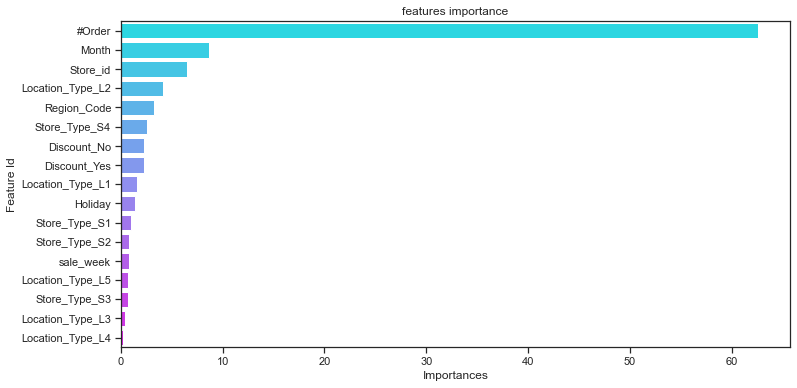

In [39]:
# Create a dataframe of feature importance 
df_feature_importance = pd.DataFrame(cat_model.get_feature_importance(prettified=True))

#plotting feature importance
plt.figure(figsize=(12, 6))

feature_plot= sns.barplot(x="Importances", y="Feature Id", data=df_feature_importance,palette="cool")

plt.title('features importance')